<font color='black'><h1 align="center"> Kia cars price prediction model </h1></font>
<a id="Why"></a>

<right><img width="800" src='https://i.pinimg.com/originals/15/c4/97/15c4976dfcab6c8984839b47b70ba861.jpg'></right>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import plotly.express as px
sns.set()

# Data Exploration

In [1]:
df = pd.read_csv(r'C:\Users\CafarzadaAC\Downloads\aprojects\KIA\kia_cars.csv')
df.head()

<IPython.core.display.Javascript object>

,city,year,brand,model,color,body_type,engine,engine_power,fuel_type,kilometrage,transmission,drivetrain,new,price
0,Sumqayıt,2008,Kia,Ceed,Göy,Universal,1.6 L,115 a.g.,Dizel,167 055 km,Mexaniki,Ön,Xeyr,14 300 AZN
1,Bakı,2012,Kia,Sorento,Gümüşü,Offroader / SUV,2.0 L,170 a.g.,Dizel,154 000 km,Avtomat,Tam,Xeyr,32 700 AZN
2,Bakı,2015,Kia,Sorento,Ağ,Offroader / SUV,2.2 L,197 a.g.,Dizel,97 000 km,Avtomat,Tam,Xeyr,43 900 AZN
3,Sumqayıt,2008,Kia,Ceed,Gümüşü,Hetçbek / Liftbek,1.4 L,109 a.g.,Benzin,152 524 km,Mexaniki,Ön,Xeyr,13 200 AZN
4,Bakı,2013,Kia,Sorento,Ağ,Offroader / SUV,2.0 L,184 a.g.,Dizel,61 838 km,Avtomat,Tam,Xeyr,32 850 AZN


In [2]:
df.shape

(3867, 14)

We have 3867 rows and 14 columns in the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3867 entries, 0 to 3866
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          3867 non-null   object
 1   year          3867 non-null   int64 
 2   brand         3867 non-null   object
 3   model         3867 non-null   object
 4   color         3867 non-null   object
 5   body_type     3867 non-null   object
 6   engine        3867 non-null   object
 7   engine_power  3867 non-null   object
 8   fuel_type     3867 non-null   object
 9   kilometrage   3867 non-null   object
 10  transmission  3867 non-null   object
 11  drivetrain    3867 non-null   object
 12  new           3867 non-null   object
 13  price         3867 non-null   object
dtypes: int64(1), object(13)
memory usage: 423.1+ KB


There are two formats of data types:<br>

**object**: Object format means variables are categorical. Categorical variables in our dataset are all of the columns except year. Actually there is inconsistency here because some columns should be integer data type such as price. We will fix it soon. <br>
**int64**: It represents the integer variables. year column is of this format.

# Data Cleaning

### Missing and Duplicate values

In [4]:
df.isnull().sum().sum()
# We don't have any null value

0

In [5]:
# Check for duplicates
df.duplicated().sum()

1297

In [6]:
# Remove duplicates
df.drop_duplicates(inplace = True)

In [7]:
df.isnull().sum().sum()
# We don't have any null value

0

### Fixing inconsistencies

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2570 entries, 0 to 3866
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   city          2570 non-null   object
 1   year          2570 non-null   int64 
 2   brand         2570 non-null   object
 3   model         2570 non-null   object
 4   color         2570 non-null   object
 5   body_type     2570 non-null   object
 6   engine        2570 non-null   object
 7   engine_power  2570 non-null   object
 8   fuel_type     2570 non-null   object
 9   kilometrage   2570 non-null   object
 10  transmission  2570 non-null   object
 11  drivetrain    2570 non-null   object
 12  new           2570 non-null   object
 13  price         2570 non-null   object
dtypes: int64(1), object(13)
memory usage: 301.2+ KB


Let's look for inconsistencies in dataset. We can clearly see that when some columns should be numeric they are in object type. Such as `Price` , `Engine`, `Kilometrage`, `Engine_power`. Let's transform them to numeric columns first.

`Price` column

In [9]:
# Since values in price column are in different currencies. We should convert all to AZN
df['currency_price'] = df['price']

In [16]:
df.head()

,city,year,brand,model,color,body_type,engine,engine_power,fuel_type,kilometrage,transmission,drivetrain,new,price,currency_price
0,Sumqayıt,2008,Kia,Ceed,Göy,Universal,1.6 L,115 a.g.,Dizel,167 055 km,Mexaniki,Ön,Xeyr,14 300 AZN,14 300 AZN
1,Bakı,2012,Kia,Sorento,Gümüşü,Offroader / SUV,2.0 L,170 a.g.,Dizel,154 000 km,Avtomat,Tam,Xeyr,32 700 AZN,32 700 AZN
2,Bakı,2015,Kia,Sorento,Ağ,Offroader / SUV,2.2 L,197 a.g.,Dizel,97 000 km,Avtomat,Tam,Xeyr,43 900 AZN,43 900 AZN
3,Sumqayıt,2008,Kia,Ceed,Gümüşü,Hetçbek / Liftbek,1.4 L,109 a.g.,Benzin,152 524 km,Mexaniki,Ön,Xeyr,13 200 AZN,13 200 AZN
4,Bakı,2013,Kia,Sorento,Ağ,Offroader / SUV,2.0 L,184 a.g.,Dizel,61 838 km,Avtomat,Tam,Xeyr,32 850 AZN,32 850 AZN


In [17]:
df['price'] = df['price'].apply(lambda x: int(x.replace(' ','').replace('AZN', '').replace('$', '').replace('€','')))

In [18]:
df.head()

,city,year,brand,model,color,body_type,engine,engine_power,fuel_type,kilometrage,transmission,drivetrain,new,price,currency_price
0,Sumqayıt,2008,Kia,Ceed,Göy,Universal,1.6 L,115 a.g.,Dizel,167 055 km,Mexaniki,Ön,Xeyr,14300,14 300 AZN
1,Bakı,2012,Kia,Sorento,Gümüşü,Offroader / SUV,2.0 L,170 a.g.,Dizel,154 000 km,Avtomat,Tam,Xeyr,32700,32 700 AZN
2,Bakı,2015,Kia,Sorento,Ağ,Offroader / SUV,2.2 L,197 a.g.,Dizel,97 000 km,Avtomat,Tam,Xeyr,43900,43 900 AZN
3,Sumqayıt,2008,Kia,Ceed,Gümüşü,Hetçbek / Liftbek,1.4 L,109 a.g.,Benzin,152 524 km,Mexaniki,Ön,Xeyr,13200,13 200 AZN
4,Bakı,2013,Kia,Sorento,Ağ,Offroader / SUV,2.0 L,184 a.g.,Dizel,61 838 km,Avtomat,Tam,Xeyr,32850,32 850 AZN


In [22]:
df.loc[df['currency_price'].str.contains('\$'), 'price'] = df['price'] * 1.7
# Right now US Dollars to Azerbaijan Manats Exchange Rate is 1.7
df.loc[df['currency_price'].str.contains('€'), 'price'] = df['price'] * 1.94
# Right now Euros to Azerbaijan Manats Exchange Rate is 1.94

In [25]:
# Rename name of price columns that shows currency of column
df.rename(columns = {'price':'price(AZN)'},inplace = True)

In [27]:
# drop currency price column
df.drop(['currency_price'],axis = 'columns', inplace = True)

In [28]:
df.head()

,city,year,brand,model,color,body_type,engine,engine_power,fuel_type,kilometrage,transmission,drivetrain,new,price(AZN)
0,Sumqayıt,2008,Kia,Ceed,Göy,Universal,1.6 L,115 a.g.,Dizel,167 055 km,Mexaniki,Ön,Xeyr,14300.0
1,Bakı,2012,Kia,Sorento,Gümüşü,Offroader / SUV,2.0 L,170 a.g.,Dizel,154 000 km,Avtomat,Tam,Xeyr,32700.0
2,Bakı,2015,Kia,Sorento,Ağ,Offroader / SUV,2.2 L,197 a.g.,Dizel,97 000 km,Avtomat,Tam,Xeyr,43900.0
3,Sumqayıt,2008,Kia,Ceed,Gümüşü,Hetçbek / Liftbek,1.4 L,109 a.g.,Benzin,152 524 km,Mexaniki,Ön,Xeyr,13200.0
4,Bakı,2013,Kia,Sorento,Ağ,Offroader / SUV,2.0 L,184 a.g.,Dizel,61 838 km,Avtomat,Tam,Xeyr,32850.0


**`Engine` column**

In [29]:
df['engine'].unique()

array(['1.6 L', '2.0 L', '2.2 L', '1.4 L', '2.4 L', '1.5 L', '1.1 L',
       '1.7 L', '1.8 L', '2.5 L', '3.8 L', '3.3 L', '3.0 L', '1.0 L',
       '3.5 L', '2.7 L', '1.3 L', '1.2 L', '2.8 L', '2.9 L'], dtype=object)

In [30]:
df['engine(L)'] = df['engine'].apply(lambda x: float(x.replace(' L','')))
df.drop(['engine'], axis = 1, inplace = True)

In [31]:
df.head()

,city,year,brand,model,color,body_type,engine_power,fuel_type,kilometrage,transmission,drivetrain,new,price(AZN),engine(L)
0,Sumqayıt,2008,Kia,Ceed,Göy,Universal,115 a.g.,Dizel,167 055 km,Mexaniki,Ön,Xeyr,14300.0,1.6
1,Bakı,2012,Kia,Sorento,Gümüşü,Offroader / SUV,170 a.g.,Dizel,154 000 km,Avtomat,Tam,Xeyr,32700.0,2.0
2,Bakı,2015,Kia,Sorento,Ağ,Offroader / SUV,197 a.g.,Dizel,97 000 km,Avtomat,Tam,Xeyr,43900.0,2.2
3,Sumqayıt,2008,Kia,Ceed,Gümüşü,Hetçbek / Liftbek,109 a.g.,Benzin,152 524 km,Mexaniki,Ön,Xeyr,13200.0,1.4
4,Bakı,2013,Kia,Sorento,Ağ,Offroader / SUV,184 a.g.,Dizel,61 838 km,Avtomat,Tam,Xeyr,32850.0,2.0


`Kilometrage` column

In [32]:
df['kilometrage'].unique()

array(['167 055 km', '154 000 km', '97 000 km', ..., '32 992 km',
       '364 518 km', '339 000 km'], dtype=object)

In [33]:
df['kilometrage'] = df['kilometrage'].apply(lambda x: int(x.replace(' km', '').replace(' ', '')))

`Engine_power` column

In [35]:
df['engine_power'].unique()

array(['115 a.g.', '170 a.g.', '197 a.g.', '109 a.g.', '184 a.g.',
       '180 a.g.', '274 a.g.', '188 a.g.', '202 a.g.', '65 a.g.',
       '166 a.g.', '97 a.g.', '165 a.g.', '174 a.g.', '150 a.g.',
       '90 a.g.', '123 a.g.', '247 a.g.', '143 a.g.', '163 a.g.',
       '141 a.g.', '110 a.g.', '125 a.g.', '116 a.g.', '132 a.g.',
       '175 a.g.', '126 a.g.', '200 a.g.', '140 a.g.', '107 a.g.',
       '177 a.g.', '124 a.g.', '100 a.g.', '293 a.g.', '149 a.g.',
       '94 a.g.', '130 a.g.', '136 a.g.', '148 a.g.', '82 a.g.',
       '242 a.g.', '99 a.g.', '112 a.g.', '80 a.g.', '186 a.g.',
       '266 a.g.', '75 a.g.', '105 a.g.', '185 a.g.', '290 a.g.',
       '178 a.g.', '204 a.g.', '69 a.g.', '194 a.g.', '156 a.g.',
       '122 a.g.', '145 a.g.', '240 a.g.', '85 a.g.', '60 a.g.',
       '106 a.g.', '181 a.g.', '83 a.g.', '101 a.g.', '64 a.g.',
       '176 a.g.', '157 a.g.', '245 a.g.', '333 a.g.', '139 a.g.',
       '133 a.g.', '164 a.g.', '294 a.g.', '260 a.g.', '15 a.g.',
       '2

In [36]:
df['engine_power(hp)'] = df['engine_power'].apply(lambda x: int(x.replace(' a.g.', '')))
df.drop(['engine_power'],axis = 'columns', inplace = True)

Now let's look at how data look like after cleaning and changes

In [37]:
df.head()

,city,year,brand,model,color,body_type,fuel_type,kilometrage,transmission,drivetrain,new,price(AZN),engine(L),engine_power(hp)
0,Sumqayıt,2008,Kia,Ceed,Göy,Universal,Dizel,167055,Mexaniki,Ön,Xeyr,14300.0,1.6,115
1,Bakı,2012,Kia,Sorento,Gümüşü,Offroader / SUV,Dizel,154000,Avtomat,Tam,Xeyr,32700.0,2.0,170
2,Bakı,2015,Kia,Sorento,Ağ,Offroader / SUV,Dizel,97000,Avtomat,Tam,Xeyr,43900.0,2.2,197
3,Sumqayıt,2008,Kia,Ceed,Gümüşü,Hetçbek / Liftbek,Benzin,152524,Mexaniki,Ön,Xeyr,13200.0,1.4,109
4,Bakı,2013,Kia,Sorento,Ağ,Offroader / SUV,Dizel,61838,Avtomat,Tam,Xeyr,32850.0,2.0,184


# Exploratory Analysis and Visualization

Let's analyse the numeric columns and their statistics

In [298]:
df.describe()

,year,kilometrage,price(AZN),engine(L),engine_power(hp)
count,2570.000000,2.570000e+03,2570.000000,2570.000000,2570.000000
mean,2010.442802,1.610973e+05,20328.645642,1.814008,151.392607
std,3.966583,8.665278e+04,9940.820596,0.414958,54.184692
min,1995.000000,0.000000e+00,1950.000000,1.000000,15.000000
25%,2007.000000,1.125000e+05,13000.000000,1.500000,109.000000
50%,2010.000000,1.620000e+05,17500.000000,1.800000,140.000000
75%,2013.000000,2.000000e+05,25600.000000,2.000000,184.000000
max,2022.000000,2.670000e+06,110500.000000,3.800000,370.000000


**Insights:**<br>
`price(AZN):` The average price for second hand Kia car in Azerbaijan is around 20 320 AZN, highest price is 110 500 AZN but also cheapest ones around 1950 AZN can be found.

`kilometrage:` The mean kilometrage for used KIA cars are 161k km and highest one is 2 mln km. There also new cars as well with 0 kilometrage.

`engine_power(hp):` The average horsepower is around 151. Most powerful car has a horsepower of 370 while the least power car has a horsepower around 15.



In [299]:
df.corr()

,year,kilometrage,price(AZN),engine(L),engine_power(hp)
year,1.000000,-0.509379,0.751983,0.213164,0.484675
kilometrage,-0.509379,1.000000,-0.423914,-0.028237,-0.231065
price(AZN),0.751983,-0.423914,1.000000,0.453639,0.584105
engine(L),0.213164,-0.028237,0.453639,1.000000,0.689972
engine_power(hp),0.484675,-0.231065,0.584105,0.689972,1.000000


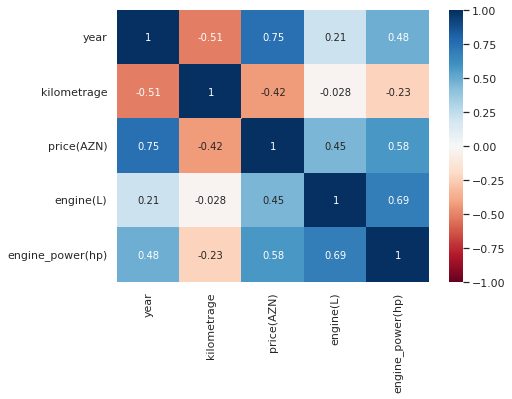

In [300]:
plt.figure(figsize = (7,5))
sns.heatmap(df.corr(), annot = True, cmap = 'RdBu', vmin = -1, vmax = 1)

#### The following inferences can be made from correlation heatmap:
Price is highly (positively) correlated to the `year`, `engine(L)` and `engine_power(hp)` columns. New model cars cost high as expected
<br>
Price is negatively correlated to `kilometrage`. Means if car has been used for long time price decreases


Text(0.5, 1.0, 'Number of Cars Per Model')

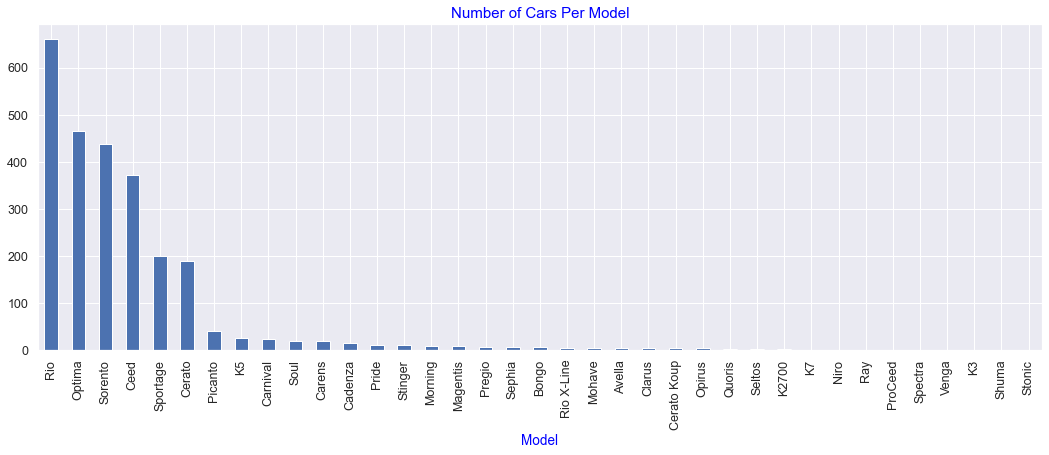

In [43]:
# Firstly, let's look at number of cars per model 
df['model'].value_counts().plot(kind = 'bar', figsize = (18,6),fontsize = 12.5)
plt.xlabel('Model',fontsize = 13.5,color = 'blue')
plt.title('Number of Cars Per Model',fontsize=15, color = 'blue')

 Most of the car models for sale are `Rio`, `Optima`, `Sorento`, `Ceed` and `Sportage` 

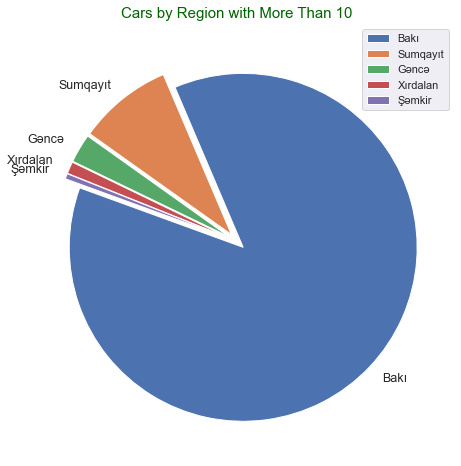

In [44]:
regions = df['city'].value_counts()
more_cars_regions = regions[regions > 10]
more_cars_regions.plot(kind = 'pie', figsize = (8,8),fontsize = 12.5, 
                                     explode = (0.05, 0.05,0.05, 0.05,0.05), 
                                     ylabel = '', 
                                     legend=True, 
                                     startangle= 160)
plt.title('Cars by Region with More Than 10',fontsize=15, color = '#006400')
plt.savefig('regions')

Regions with most of the cars are `Bakı`, `Sumqayıt`, `Gəncə`, `Xırdalan`and `Şəmkir`

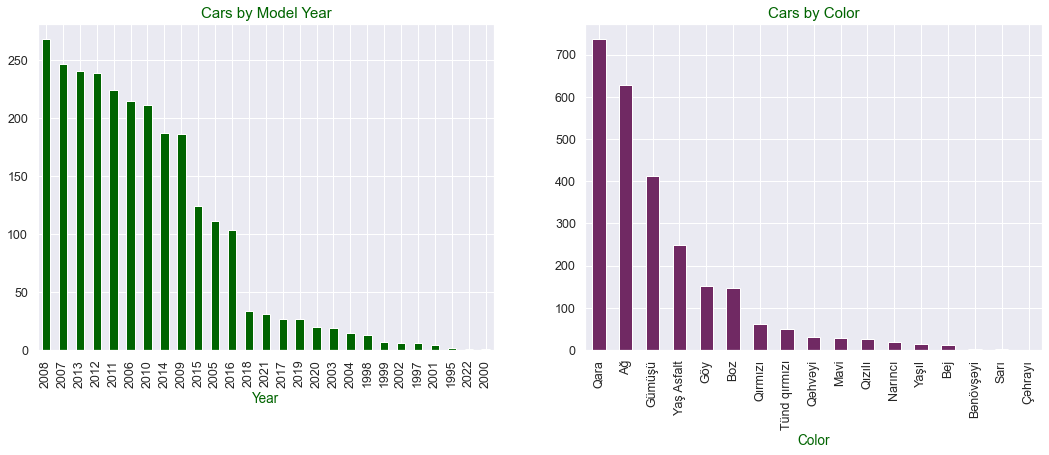

In [45]:
plt.subplot(1,2,1)
df['year'].value_counts().plot(kind = 'bar', figsize = (18,6),fontsize = 12.5,color = '#006400')
plt.xlabel('Year',fontsize = 13.5,color = '#006400')
plt.title('Cars by Model Year',fontsize=15, color = '#006400')
plt.subplot(1,2,2)
df['color'].value_counts().plot(kind = 'bar', figsize = (18,6),fontsize = 12.5,color = '#702963')
plt.xlabel('Color',fontsize = 13.5, color = '#006400')
plt.title('Cars by Color', fontsize=15, color = '#006400')
plt.savefig('cars by model and color')

The following inferences can be made from the above bar plots:<br>

Model year of most of the cars are `2008`, `2007`, `2013`, `2012` and `2011` 
<br> And color of most of the cars are `'Qara'`, `'Ağ'`, `'Gümüşü'`, `Yaş Asfalt`and `Göy`

Text(0.5, 1.0, 'Most expensive cars')

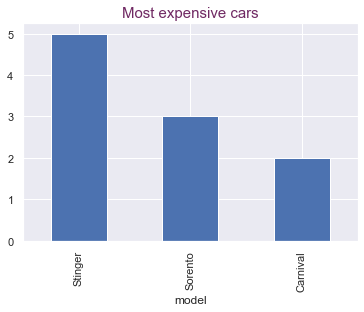

In [46]:
expensive_models = df.sort_values('price(AZN)', ascending = False).head(10)
expensive_models.groupby(['model'])['price(AZN)'].agg('count').sort_values(ascending = False).plot(kind = 'bar')
plt.title('Most expensive cars',fontsize=15, color = '#702963')

Most expensive KIA cars are `Stinger`, `Sorento` and `Carnival`

In [7]:
fig = px.histogram(df, x="price(AZN)", marginal="box", title='Price Distribution of Second Hand Kia Cars in Azerbaijan')
fig.update_layout(yaxis_title = 'Number of cars')
fig.update_layout(xaxis_title = 'Price (AZN)')

<IPython.core.display.Javascript object>

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['city', 'year', 'brand', 'model', 'color', 'body_type', 'engine', 'engine_power', 'fuel_type', 'kilometrage', 'transmission', 'drivetrain', 'new', 'price'] but received: price(AZN)

# Feature Engineering

### Normalization

**Price Column**

Text(0.5, 1.0, 'Normalized Price Distribution')

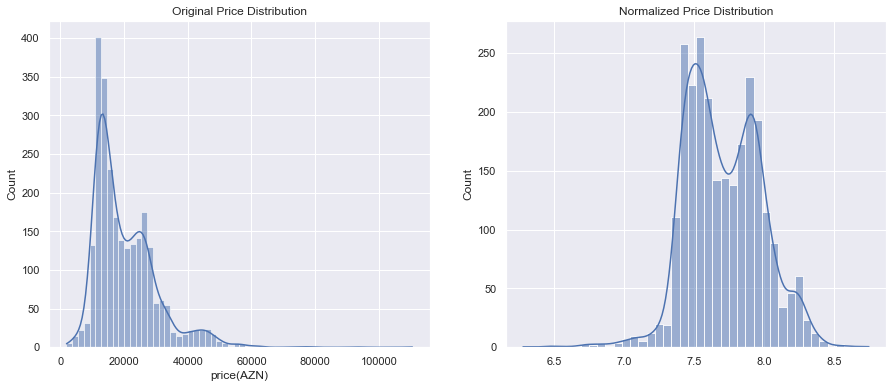

In [49]:
# Let's compare Price distribution before and after
normalized_price = stats.boxcox(df['price(AZN)'].loc[df['price(AZN)'] > 0 ])[0]
fig, ax = plt.subplots(1,2, figsize = (15,6))
sns.histplot(df['price(AZN)'],ax = ax[0], kde = True)
ax[0].set_title('Original Price Distribution')
sns.histplot(normalized_price, ax = ax[1], kde = True)
ax[1].set_title('Normalized Price Distribution')

In [50]:
df['price(AZN)'] = stats.boxcox(df['price(AZN)'])[0]

**Kilometrage Column**

Text(0.5, 1.0, 'Normalized Kilometrage Distribution')

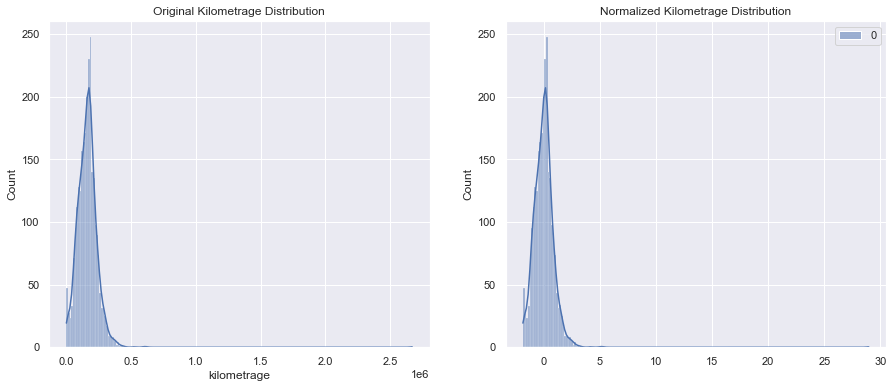

In [56]:
scaling = StandardScaler()
fig, ax = plt.subplots(1,2, figsize = (15,6))
sns.histplot(df['kilometrage'], ax = ax[0], kde = True)
ax[0].set_title('Original Kilometrage Distribution')
sns.histplot(scaling.fit_transform(df[['kilometrage']]), ax = ax[1], kde = True)
ax[1].set_title('Normalized Kilometrage Distribution')

In [309]:
df['kilometrage'] = scaling.fit_transform(df[['kilometrage']])

### Outlier detection

**Price Column**

<AxesSubplot:xlabel='price(AZN)'>

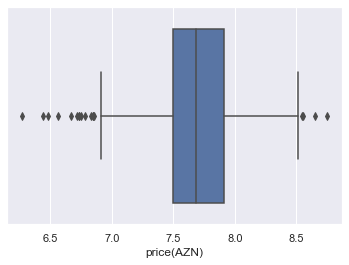

In [58]:
sns.boxplot(x=df['price(AZN)'])

In [59]:
lower_limit, upper_limit = (df['price(AZN)'].mean() - 2*df['price(AZN)'].std(), df['price(AZN)'].mean() + 2*df['price(AZN)'].std())
df = df[(df['price(AZN)']>lower_limit) & (df['price(AZN)'] < upper_limit)]

**Kilometrage Column**

<AxesSubplot:xlabel='kilometrage'>

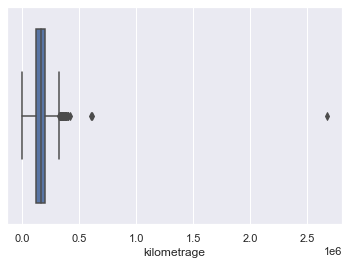

In [61]:
sns.boxplot(x = df['kilometrage'])

In [66]:
lower_limit2, upper_limit2 = (df['kilometrage'].mean()-2*df['kilometrage'].std(), df['kilometrage'].mean()+2*df['kilometrage'].std())
df2 = df[(df['kilometrage'] > lower_limit2) & (df['kilometrage'] < upper_limit2)]

### Reducing cardinality

In [67]:
object_columns = df.select_dtypes('object').columns
for col in object_columns:
    print('Number of unique values in column',col, df[col].nunique())

Number of unique values in column city 47
Number of unique values in column brand 1
Number of unique values in column model 32
Number of unique values in column color 17
Number of unique values in column body_type 9
Number of unique values in column fuel_type 4
Number of unique values in column transmission 2
Number of unique values in column drivetrain 3
Number of unique values in column new 2


**City column**

In [68]:
city_unique_values = df['city'].value_counts()
city_unique_values

Bakı          2020
Sumqayıt       205
Gəncə           62
Xırdalan        27
Şəmkir          11
Lənkəran         8
Naxçıvan         7
Tovuz            7
Şəki             7
Şirvan           6
Beyləqan         5
Bərdə            5
Şabran           5
Quba             5
Xaçmaz           5
Mingəçevir       5
Göyçay           5
Kürdəmir         4
Salyan           4
Masallı          4
Şamaxı           4
Qəbələ           3
Sabirabad        3
İmişli           3
Biləsuvar        3
Göygöl           3
Astara           3
İsmayıllı        3
Cəlilabad        3
Qax              2
Ağstafa          2
Tərtər           2
Ağdaş            2
Balakən          2
Neftçala         2
Goranboy         2
Qusar            2
Zaqatala         1
Ağcabədi         1
Ucar             1
Füzuli           1
Qazax            1
Cəbrayıl         1
Yevlax           1
Ağsu             1
Xudat            1
Qobustan         1
Name: city, dtype: int64

In [69]:
city_less_than_10 = city_unique_values[city_unique_values < 8]
df['city'] = df['city'].apply(lambda x: 'Başqa Bölgə' if x in city_less_than_10 else x)

In [70]:
df['city'].nunique()

7

**Color column**

In [71]:
color_unique_values = df['color'].value_counts()
color_unique_values

Qara            714
Ağ              604
Gümüşü          406
Yaş Asfalt      242
Göy             135
Boz             134
Qırmızı          58
Tünd qırmızı     47
Qəhvəyi          29
Mavi             27
Qızılı           21
Narıncı          18
Bej              11
Yaşıl            10
Bənövşəyi         2
Sarı              2
Çəhrayı           1
Name: color, dtype: int64

In [72]:
color_less_than_50 = color_unique_values[color_unique_values< 50]
df['color'] = df['color'].apply(lambda x: 'Başqa rəng' if x in color_less_than_50 else x)

In [73]:
df['color'].nunique()

8

**Model column**

In [74]:
model_unique_values = df['model'].value_counts()
model_unique_values

Rio            654
Optima         462
Sorento        415
Ceed           371
Cerato         188
Sportage       187
Picanto         40
Soul            20
Carens          19
Cadenza         15
Carnival        14
Pride           11
Morning          9
Magentis         8
K5               8
Rio X-Line       5
Pregio           5
Mohave           5
Bongo            4
Cerato Koup      4
Opirus           4
Quoris           3
Venga            1
Stinger          1
K2700            1
Seltos           1
Sephia           1
Niro             1
Ray              1
Spectra          1
K3               1
Stonic           1
Name: model, dtype: int64

In [75]:
models_less_12 =  model_unique_values[model_unique_values < 20]
df['model'] = df['model'].apply(lambda x: 'Başqa Model' if x in models_less_12 else x)

In [76]:
df['model'].nunique()

9

### Categorical data Encoding

In [79]:
body_type = pd.get_dummies(df['body_type'], drop_first = True)
fuel_type = pd.get_dummies(df['fuel_type'], drop_first = True)
transmission = pd.get_dummies(df['transmission'], drop_first = True)
drivetrain = pd.get_dummies(df['drivetrain'], drop_first = True)
city = pd.get_dummies(df['city'], drop_first = True)
color = pd.get_dummies(df['color'], drop_first = True)
model = pd.get_dummies(df['model'], drop_first = True)
df.drop(['body_type', 'fuel_type', 'transmission', 'drivetrain','city', 'color', 'model'], axis = 1, inplace = True)
df = pd.concat([df, body_type,fuel_type,transmission,drivetrain,city,color, model], axis = 1)
df.head()

,year,brand,kilometrage,new,price(AZN),engine(L),engine_power(hp),Hetçbek / Liftbek,Kupe,Mikroavtobus,...,Qırmızı,Yaş Asfalt,Ceed,Cerato,Optima,Picanto,Rio,Sorento,Soul,Sportage
0,2008,Kia,167055,Xeyr,7.558577,1.6,115,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2012,Kia,154000,Xeyr,8.053890,2.0,170,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2015,Kia,97000,Xeyr,8.225252,2.2,197,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,2008,Kia,152524,Xeyr,7.509518,1.4,109,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2013,Kia,61838,Xeyr,8.056573,2.0,184,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Splitting data to train and test 

In [80]:
X = df.drop(['brand','new','price(AZN)'], axis = 1)
y = df['price(AZN)']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

# Choosing best model

### Linear Regression Model

In [82]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [83]:
# Prediction on test data
test_pred_lin = lin_model.predict(X_test)

In [84]:
accuracy_lr = round(lin_model.score(X_test, y_test),3)
accuracy_lr

0.893

In [85]:
# Let's visualize how close the predicted values to real prices
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred_lin})
eval_df.head()

,Actual,Predicted
2532,7.981243,7.939474
2590,8.106861,8.036913
171,7.987334,8.009610
3186,7.476006,7.473806
3450,8.050293,8.055720


In [86]:
print('Accuracy of model:', lin_model.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred_lin)))

Accuracy of model: 0.8933945777360591
Root Mean Squared Error: 0.0808840386179632


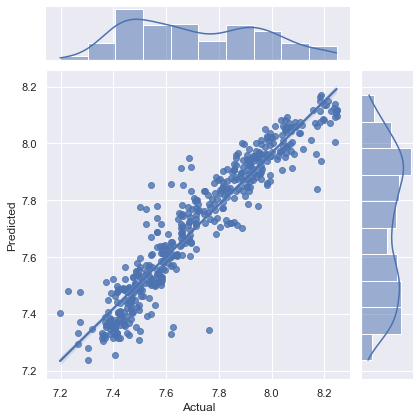

In [87]:
sns.jointplot(x = 'Actual', y = 'Predicted', data = eval_df, kind = 'reg')

In [90]:
# Save the model
import pickle
with open('model_pickle', 'wb') as f:
    pickle.dump(lin_model, f)

In [92]:
with open('model_pickle', 'rb') as f:
    model = pickle.load(f)

### Lasso Regression Model

In [93]:
lasso_model = Lasso()
lasso_model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [94]:
test_pred_lasso = lasso_model.predict(X_test)

In [95]:
accuracy_lasso = round(lasso_model.score(X_test, y_test),3)
accuracy_lasso

0.522

In [96]:
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred_lasso})
eval_df.head()

,Actual,Predicted
2532,7.981243,7.849902
2590,8.106861,7.813233
171,7.987334,7.737945
3186,7.476006,7.591680
3450,8.050293,7.790722


In [97]:
print('Accuracy:',lasso_model.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred_lasso)))

Accuracy: 0.5216824943045393
Root Mean Squared Error: 0.17132917290990393


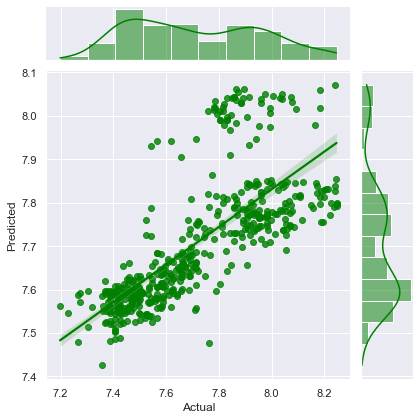

In [98]:
sns.jointplot(x = 'Actual', y = 'Predicted', data = eval_df, kind = 'reg', color = 'green')

### DecisionTreeRegressor

In [99]:
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [100]:
test_pred_dtr = dtr_model.predict(X_test)

In [101]:
accuracy_dtr = round(dtr_model.score(X_test, y_test),3)
accuracy_dtr

0.9

In [102]:
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': test_pred_dtr})
eval_df.head()

,Actual,Predicted
2532,7.981243,7.929983
2590,8.106861,7.989350
171,7.987334,7.987334
3186,7.476006,7.471058
3450,8.050293,8.164104


In [103]:
print('Accuracy:',dtr_model.score(X_test, y_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_pred_dtr)))

Accuracy: 0.9004590090007085
Root Mean Squared Error: 0.07815813010658378


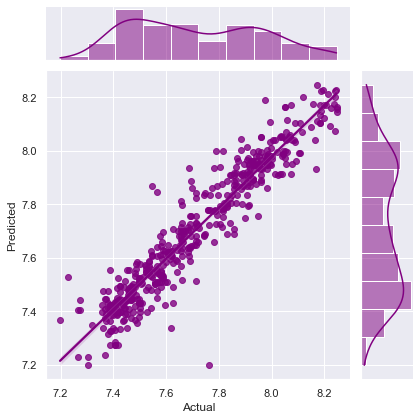

In [104]:
sns.jointplot(x = 'Actual', y = 'Predicted', data = eval_df, kind = 'reg', color = 'purple')

### Comparision

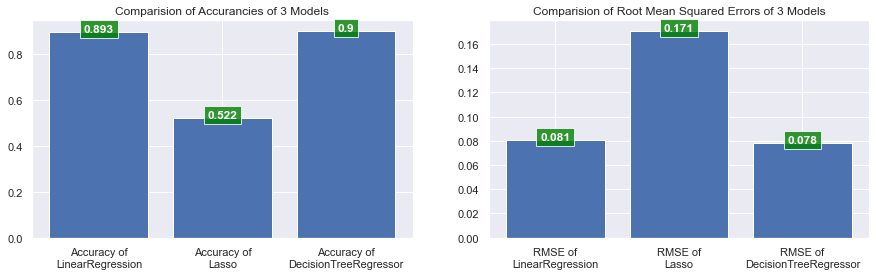

In [105]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center',fontweight='bold',color='white',
                 bbox = dict(facecolor = 'green', alpha =.8))
plt.subplots(figsize=(15,4))
plt.subplot(1,2,1)
x1 = ['Accuracy of\nLinearRegression','Accuracy of\nLasso','Accuracy of\nDecisionTreeRegressor']
y1 = [accuracy_lr,accuracy_lasso,accuracy_dtr]
plt.bar(x1,y1)
plt.title('Comparision of Accurancies of 3 Models')
addlabels(x1,y1)
plt.subplot(1,2,2)
x = ['RMSE of\nLinearRegression','RMSE of\nLasso','RMSE of\nDecisionTreeRegressor']
y = [round(np.sqrt(metrics.mean_squared_error(y_test, test_pred_lin)),3),
     round(np.sqrt(metrics.mean_squared_error(y_test, test_pred_lasso)),3),
     round(np.sqrt(metrics.mean_squared_error(y_test, test_pred_dtr)),3)]
plt.bar(x,y)
plt.title('Comparision of Root Mean Squared Errors of 3 Models')
addlabels(x, y)
plt.savefig('comparision')

As we can see from graph above both in terms of Accuracy and RMSE DecisionTreeRegressor Model performs better. So we are going to use DecisionTreeRegressor